## Import necessary libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np


## Dataset Overview

In [11]:
# Load Dataset
print("Loading dataset...")
df = pd.read_csv("jigsaw-toxic-comment-train.csv", usecols=["comment_text", "toxic"]) # First 10k rows
print("Training data size , ", len(df))
validation_df = pd.read_csv("validation.csv")
print("Validation Data Size:", len(validation_df))
test_df = pd.read_csv("test.csv")
print("test Data Size:", len(test_df))

Loading dataset...
Training data size ,  223549
Validation Data Size: 8000
test Data Size: 63812


## Understanding basic information about the training dataset

In [13]:

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nFirst Few Rows:")
print(data.head())


Dataset Shape: (223549, 2)

Column Names: Index(['comment_text', 'toxic'], dtype='object')

First Few Rows:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


## Checking missing values
Missing Values: Checked and found none.

In [22]:

print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


## Label Distribution
Class Distribution:
90.4% of comments are non-toxic.
9.6% of comments are toxic.


Label Distribution:
toxic
0    202165
1     21384
Name: count, dtype: int64


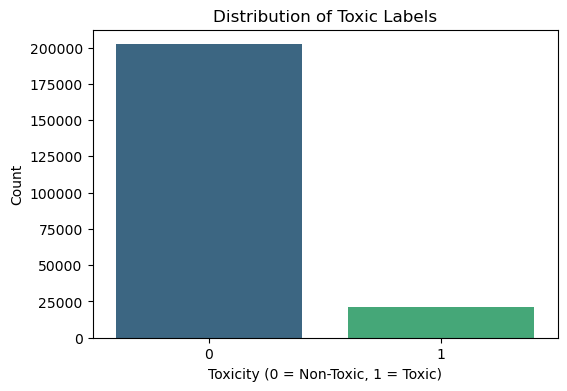

In [27]:

print("\nLabel Distribution:")
label_counts = data['toxic'].value_counts()
print(label_counts)

# Plot the label distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title("Distribution of Toxic Labels")
plt.xlabel("Toxicity (0 = Non-Toxic, 1 = Toxic)")
plt.ylabel("Count")
plt.show()


## Analyze text lengths


Text Length Stats:
count    223549.000000
mean        391.012709
std         592.862955
min           1.000000
25%          93.000000
50%         203.000000
75%         431.000000
max        5000.000000
Name: text_length, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


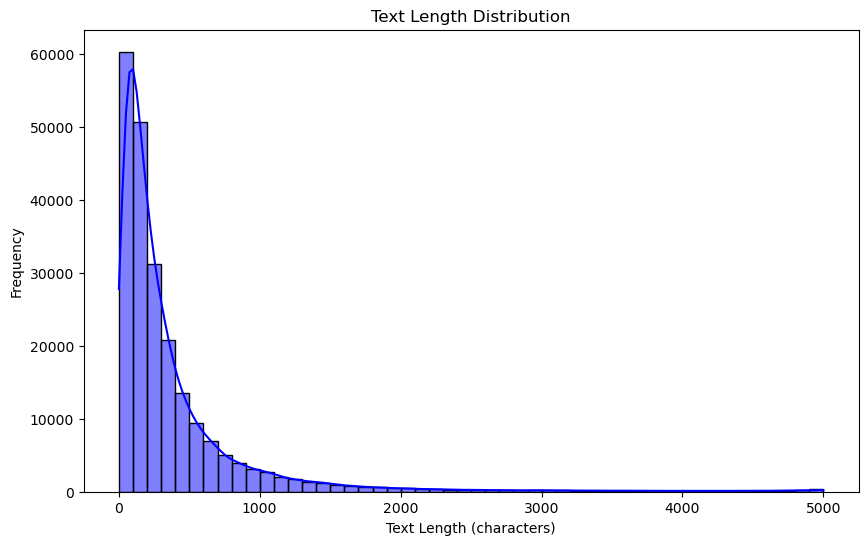

In [13]:

data['text_length'] = data['comment_text'].apply(len)
print("\nText Length Stats:")
print(data['text_length'].describe())

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=True, color='blue')
plt.title("Text Length Distribution")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()



## WordCloud for Toxic and Non-Toxic Comments
Generated for toxic and non-toxic comments to visualize common words.

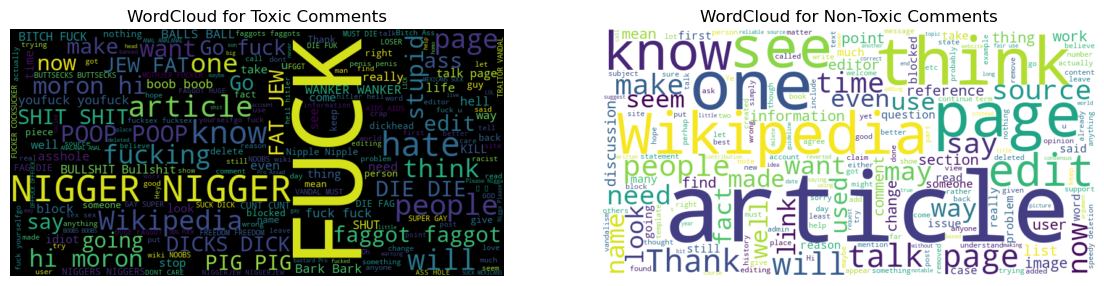

In [15]:
toxic_comments = " ".join(data[data['toxic'] == 1]['comment_text'])
non_toxic_comments = " ".join(data[data['toxic'] == 0]['comment_text'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black').generate(toxic_comments)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Toxic Comments")

plt.subplot(1, 2, 2)
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Non-Toxic Comments")

plt.show()
